In [174]:

########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [175]:
def view_KNNC(classifier,X,Y,Train_error,Test_error,x0lim,x1lim,res):
    
    x0_grid = np.linspace(x0lim[0], x0lim[1], res)
    x1_grid = np.linspace(x0lim[0], x0lim[1], res)

    Y_grid = np.zeros((res, res))
    
   
    for i0, x0 in enumerate(x0_grid):
      for i1, x1 in enumerate(x1_grid):          
        Y_grid[i0, i1]=classifier.predict(np.array([[x0, x1]]))
      
    plt.pcolormesh(x0_grid, x1_grid, Y_grid, cmap="coolwarm")
    
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
    plt.axis("equal")
    
  
    
    clear_output(wait=True)

    plt.show()
    


(400, 2)
(400, 1)


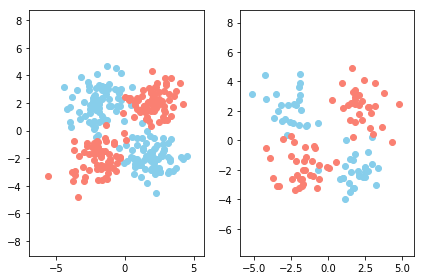

In [176]:
########## PREPARAR LA DATA ##########
#Random Data to test
N=100
np.random.seed(8)
X1 = np.r_[np.random.randn(N,2)-[2,-2],np.random.randn(N,2)+[2,-2]];
X2 = np.r_[np.random.randn(N,2)-[2, 2],np.random.randn(N,2)+[2, 2]];
X = np.concatenate((X1,X2))
Y = [0]*2*N+[1]*2*N
Y = np.asarray(Y)
Y = Y[:, np.newaxis]


print(X.shape)
print(Y.shape)

Xe, Xv, Ye, Yv =train_test_split(X,Y,test_size=0.3)

fig1,axs=plt.subplots(1,2)

axs[0].scatter(Xe[Ye[:, 0] == 0, 0], Xe[Ye[:, 0] == 0, 1], c="skyblue")
axs[0].scatter(Xe[Ye[:, 0] == 1, 0], Xe[Ye[:, 0] == 1, 1], c="salmon")

axs[0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[0].axis("equal")

axs[1].scatter(Xv[Yv[:, 0] == 0, 0], Xv[Yv[:, 0] == 0, 1], c="skyblue")
axs[1].scatter(Xv[Yv[:, 0] == 1, 0], Xv[Yv[:, 0] == 1, 1], c="salmon")

axs[1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1].axis("equal")

plt.subplots_adjust(left=1.5, right=3, wspace=0.5)
fig1.tight_layout()
plt.show()



In [177]:
########## IMPLEMENTACIÓN DE K VECINOS MÁS CERCANOS ##########
#Definimos el algoritmo a utilizar importando la clase respectiva e instancioando una variable
Cla = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=2)
#Entrenamos el modelo
Ye=np.ravel(Ye)
Cla.fit(Xe, Ye)
#Realizamos una predicción
Yp = Cla.predict(Xv)
#print(Xv)

In [178]:
#Verificamos la matriz de Confusión
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Yv, Yp)
print('Matriz de Confusión:')
print(CM)
#Calculamos la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(Yv, Yp)
print('Precisión del modelo:')
print(precision)

Matriz de Confusión:
[[52  2]
 [ 7 59]]
Precisión del modelo:
0.9672131147540983


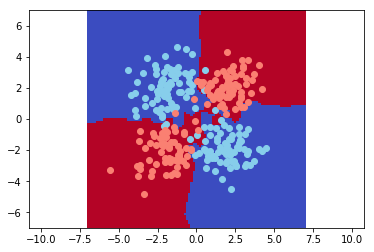

In [179]:
x0lim=[-7,7]
x1lim=[-7,7]
res=100

view_KNNC(Cla,Xe,Ye,Terr,Verr,x0lim,x1lim,res)